# Hist 3368 - Week 9: Measuring Distinctiveness with Log Likelihood 

#### By Jo Guldi and Steph Buongiorno

For citation information, please see the "Source Information" section listed in the associated README file: https://github.com/stephbuon/digital-history/tree/master/hist3368-week9-log-likelihood

We've been counting many things so far: stop-worded words and words from a controlled vocabulary, words over time, grammatical constructions and parts of speech.  

Sometimes, however, what one really wants to know is not the *raw* counts, but rather how two or more categories of counts compare to each other.

For instance, imagine that I have a dataset composed of my emails and my friend's emails. The top words for both of us are almost all the same: "time," "when," "dear," "friend," "meet", "thanks," etc.  They aren't very informative.  

However, if I measure the words that only *I* use and my friend doesn't, those words are very interesting: "bike," "handlebar," "lube"

If I measure the friends that only my friend uses, but I never use, those words are also very revealing: "scuba," "bootie," "backroll"
    
Looking for the most *distinctive* words for each of us takes you straight to the give-away clues that I'm a cyclist and my friend is a cave-diver. 

### Log Likelihood as a Score of Distinctiveness

Just so, in this notebook, we're going to learn how to use one of the most common statistical measures for calculating "distinctiveness."  That measure is "log likelihood."  Technically, it's a mathematical improvement on the naive version that I describe here, where I look for my-email(not my-friend's-email), because it performs a calculation that results in a "log likelihood score," which is a guess by the computer of how "distinctive" a word is.

Applied to the example above, the output might look like this: 

##### Jo's most distinctive words, with their distinctiveness scores calculated by log-likelihood

    bike : 1
    handlebar: 1
    lube: 1
    chain : .3
    path : .3

##### Steph's most distinctive words, with their distinctiveness scores calculated by log-likelihood

    scuba : 1
    backroll: 1
    bootie: 1
    buoyancy: .9
    tank : .3
    mask : .3
    cave : .3

Notice that there's a lot more information with these scores than in the way I originally described the experiment. The score of .3 for "path," "cave," etc. Show you that there are some words that I tend to use more than my friend, and conversely her more than me -- but we both *sometimes* use these words.  They're only 30% distinctive, whereas words like "bike" or "scuba" that only one of us uses are 100% distinctive, and therefore have a higher score. 

### The Log Likelihood equation

Here is what it looks like for one word, "bike." We need four pieces of input and one calculation: 
    
        a = how many times the word "bike" appears in Jo's email
        b = how many times the word "bike" appears in everyone else's email -- Steph's, and if we're measuring others as well, those other friends too: let's say Audre's and Beth's
        c = how many times OTHER words than "bike" 
        d = how many times OTHER words than "bike" appear in everyone else's email --  which is the equivalent of all the words in the corpus, minus a, minus b, minus c
        total_corpus_words = the total number of words in the corpus.  This should be the equivalent of a + b + c + d.
      
Next, we make three calculations to get the log likelihood score:

        E1 = (a + c) * (a + b) / total_corpus_words 
        E2 = (b + d) * (a + b) / total_corpus_words 
        
        LL = 2 * (a * log(a / E1)) + 2 * b * log(b / E2)

If you're a math nerd, you might think about how we're taking a calculation of the specificity of "a" (how often I write "bike") relative to "c" (how many words I wrote in all) and the number of total corpus words, and conversely how specific "bike" is to other people (b, d). 

The function "log" normalizes both calculations.  Further multiplications make the calculations more specific to "a" (my usage of the word) and "b" (my friends' usage of the word).  

If you feel overwhelmed: don't worry about this section.  Just accept that we're creating a numerical score of distinctiveness.  It's more important, in this class, to be able to use the distinctiveness measure than to understand where it comes from.  So long as you can run the code in the one section where we tell Python to execute a log likelihood score, you should be fine. 


### Why you want to know about distinctiveness

Distinctiveness scores can be applied to anything. If you're trying to understand what makes speakers in Congress different from each other, you can recreate the above experiment with their words and get a working definition of how different each is -- one that will be far more meaningful than the list of top words used by each, or the words used by only one but not the other.  

But you can also do so much more with this wonderful, flexible measure! You can use it to improve your understanding of time. You can use distinctiveness measures to figure out which words were more distinctive of the 1970s than the 1980s, or the 1980s than the 1990s -- and you can then make *those* words the subject of your charts over time or your questions about which speaker introduced a particularly meaningful word.  

All you have to do is understand some basic questions about how to format data, how to perform a statistical calculation, and how to use that calculation.

### What this notebook will do

This notebook will use a sample dataset from EDGAR, the quarterly reports of American corporations.  It will walk you through reformatting the data to get rid of punctuation and words that only appear once (which may be typos, and which, in any case, will throw off the log likelihood calculations, making them less useful).

We'll then bring in some tools from the SKLEARN package of statistics and machine learning software, especially CountVectorizer(), vectorizer.get_feature_names(),  and vectorizer.todense().  

A "vector" is a matrix of words and their frequency, representing every word in the corpus.  For instance, for the example above, a descriptive vector for my emails' words might look like this: 

    time : 100
    when : 100
    meet : 99
    thanks : 90
    bike: 15
    handlebar: 10
    path: 10
    lube: 4
    chain: 3

You'll use the tools of CountVectorizer to make some word vectors with data that preserves everything else you know about the words -- for instance, which company they relate to, when they were published, etc.  Along the way, we'll inspect the data so that you know what's being done to the word vector. 

We'll then apply the "log likelihood" calculation to these vectors to produce a score of what is most distinctive about each company's report.  

### A word to those new to code

If you are learning code for the first time, being able to recreate every single step along the way is far less important than getting a general feel for what the steps are:
* cleaning (which you've seen before)
* counting (which you've seen before)
* vectorizing (this is new, but it's a lot like counting words)
* working with vectors (to get them in the right format for statistical analysis)
* statistical analysis (a loop that runs the log likelihood equation)
* visualization

Try to pay attention to just a few new commands to see how they work:
* CountVectorizer() -- to turn data into a vector 
* vectorizer.get_feature_names() -- to inspect a vector 
* vectorizer.todense -- to reformat a vector for future analysis
* the for loop that runs the log likelihood equation.

Most importantly, pay attention to what the most distinctive words look like for the corporations we sample, and how we use visualizations to interpret them. Think about how this might apply to your data challenge!

### A few suggestions as you start on this week's notebooks:

* You will note that the str_replace() method of looking for words and phrases is REALLY slow: 

        df['Content'] = df['Content'].str.replace(pattern, "") 
        

  Don't be afraid to use the alternative code, which is hidden behind a comment (#):

        df['Content'] = df['Content'].apply(lambda x: " ".join(x for x in x.split() if x not in words_appear_once)) 
        

  We're not teaching the grammar of these variations, because they're deep Python rather than the easy syntax of pandas. But you are welcome to use them by copying and pasting!

* As always, if you run into trouble around *import* functions, try "installing" the software package in question: 
      
          !pip install [package] --user 
          
        
* There are at least two places where errors are supposed to occur: 

     (1) in the first few lines of loading EDGAR, where we drop or delete columns (really a cosmetic step, as I suggested in class). and 
        
     (2) where I tell you to take the log of zero, which will produce an error because the log of zero is infinity.  
    In both cases, you should read the commentary.

With that, let's dive in!

## Construct a dataset

In [ ]:
!pip install edgar --user
!pip install edgar-python --user
!pip install pandas --user

In [2]:
from edgar import Company, TXTML
import pandas as pd

In this assignment, I will consider 168 files from 8 companies EXXON MOBIL, AMAZON, Alphabet, MICROSOFT, APPLE, FORD MOTOR, RAYTHEON, MARATHON PETROLEUM.

First, we'll create an empty "dataframe" -- think of it as an empty spreadsheet ledger -- with column headings that correspond to the data structure in Edgar.  That is, the column names will be the name of each "Company," its ID number in the EDGAR system ("CIK"), when it filed ("Filing Date"), and some textual content ("Content"), etc.

In [3]:
df = pd.DataFrame(columns=['Company','CIK','Content','Filing Date','Accepted','Documents','Effectiveness Date'])

In the loop below, we're pulling in the data from EDGAR and feeding it to the appropriate column in the empty dataframe, which we've called df.  

In [2]:
companies = [
             ['EXXON MOBIL CORP','0000034088'],
             ['AMAZON COM INC', '0001018724'],
             ['Alphabet Inc.','0001652044'],
             ['MICROSOFT CORP','0000789019'],
             ['APPLE INC', '0000320193'],
             ['FORD MOTOR CO', '0000037996'],
             ['RAYTHEON CO', '0000082267'],
             ['MARATHON PETROLEUM CORP', '0001510295'],
            ]

In [4]:
for company in companies:
    print("Fetching data for ", company[0])
    edgar_company = Company(company[0], company[1])
    
    filings = edgar_company.get_all_filings(filing_type='10-K')
    
    docs = edgar_company.get_documents(tree=filings, 
                                       no_of_documents=100,
                                       as_documents=True)
    
    docs_content = edgar_company.get_10Ks(100)
    
    for doc, content in zip(docs, docs_content):
        new_row = doc.content
        new_row['Company'] = company[0]
        new_row['CIK'] = company[1]
        new_row['Content'] = TXTML.parse_full_10K(content)
        if len(new_row['Content']):
            df = df.append(new_row, ignore_index=True)


Fetching data for  EXXON MOBIL CORP


KeyboardInterrupt: 

Please note that EDGAR will cut you off from calling data too often from them, so we should plan on calling this data once and stashing it.  Run the below command.  If you have Jupyter open on m2, you should be able to look at the left-hand sidebar at the folder for digital history, and you'll see edgar-data.csv in the list. 

If you need to start over again after this step, you can skip the above, slow-going process.  Instead, use "df = pd.read_csv("edgar-data.csv")" to retrieve the data you've just saved.

In [ ]:
df.to_csv(r'edgar-data.csv', index = False) 

In [3]:
# df = pd.read_csv("edgar-data.csv") # to be used if you want to return to data previously generated

Let's look at the dataframe to make sure that the contents match our expectations.

In [271]:
df[:20]

,Company,Content,Period of Report,Accepted,CIK,Documents,Filing Date,SROs
0,EXXON MOBIL CORP,\n\n\n\n\n\n\n\n\n\n 0.086252036-04-012021-08-...,2019-12-31,NaN,NaN,NaN,NaN,NaN
1,EXXON MOBIL CORP,\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n \n\n\n\n...,2018-12-31,NaN,NaN,NaN,NaN,NaN
2,EXXON MOBIL CORP,\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n \n\n\n\n...,2017-12-31,NaN,NaN,NaN,NaN,NaN
3,EXXON MOBIL CORP,\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n \n\n\n\n...,2016-12-31,NaN,NaN,NaN,NaN,NaN
4,EXXON MOBIL CORP,\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n \n\n\n\n...,2015-12-31,NaN,NaN,NaN,NaN,NaN
5,EXXON MOBIL CORP,\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n \n\n\n\n...,2014-12-31,NaN,NaN,NaN,NaN,NaN
6,EXXON MOBIL CORP,\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n \n...,2013-12-31,NaN,NaN,NaN,NaN,NaN
7,EXXON MOBIL CORP,\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n \n\n...,2012-12-31,NaN,NaN,NaN,NaN,NaN
8,EXXON MOBIL CORP,\n\nForm 10-K\n\n \nTable of Contents\n\nIndex...,2011-12-31,NaN,NaN,NaN,NaN,NaN
9,EXXON MOBIL CORP,\n\n10-K/A\n\n \nTable of Contents\n\nIndex to...,2010-12-31,NaN,NaN,NaN,NaN,NaN


Wow! That's some messy data!

A quick tidying move: let's delete the columns for which we have no use. *Please note that if you saved data from which certain headings were deleted, and then retrieved it later, this step might produce an error. Don't worry about it!*

In [272]:
df = df.drop(columns=['CIK', 'Filing Date', 'Accepted', 'Documents', 'SROs'])
# if you get an error message, read the line of instructions above.

In [273]:
df[:10]

,Company,Content,Period of Report
0,EXXON MOBIL CORP,\n\n\n\n\n\n\n\n\n\n 0.086252036-04-012021-08-...,2019-12-31
1,EXXON MOBIL CORP,\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n \n\n\n\n...,2018-12-31
2,EXXON MOBIL CORP,\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n \n\n\n\n...,2017-12-31
3,EXXON MOBIL CORP,\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n \n\n\n\n...,2016-12-31
4,EXXON MOBIL CORP,\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n \n\n\n\n...,2015-12-31
5,EXXON MOBIL CORP,\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n \n\n\n\n...,2014-12-31
6,EXXON MOBIL CORP,\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n \n...,2013-12-31
7,EXXON MOBIL CORP,\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n\n\n\n \n\n...,2012-12-31
8,EXXON MOBIL CORP,\n\nForm 10-K\n\n \nTable of Contents\n\nIndex...,2011-12-31
9,EXXON MOBIL CORP,\n\n10-K/A\n\n \nTable of Contents\n\nIndex to...,2010-12-31


# Cleaning the Data

Let's do a couple of basic cleaning steps. Let's look at the actual text output of the Content column to get an idea of what we're dealing with.  The df.head() command in Pandas allows us to look at the first n columns of a dataframe; in this case we'll use a loop to print out the content of the first entry in the 'Content' column. 

If you printed out the whole entry for any row in the 'Content' column, you'd notice that the first section of the document is a long list of numbers and keywords that correspond to fields in a form; the actual text content follows further down below.  So we'll look at the last characters of each entry only.

In [274]:
for contenttext in df['Content'].head(3): # for the first three entries in the 'Content' column
    print(contenttext[-100:]) # print the last 100 characters

ROSENTHAL Vice President and Controller(David S. Rosenthal) (Principal Accounting Officer)    128 


   
  
 
  (Principal Accounting Officer)
  
 

  
   
  
 
   
  
 
   
  
 




 







125 





ontroller
  (Principal Accounting Officer)
  
 

  
   
  
 
   
  
 
   
  
 



 







122 







You'll notice that there are uppercase words, punctuation marks, and stopwords that will interfere with our analysis unless we do away with them.

First, let's split the text of the 'Content' column into words and lowercase them.  

Note the use of split() and lower(), and the apply() command that allows us to iterate over every row of the dataframe 'df'.  After splitting and lowering each word, we're then using join() to paste all the words back together into one long string.

In [275]:
df['Content'] = df['Content'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df.head()

,Company,Content,Period of Report
0,EXXON MOBIL CORP,0.086252036-04-012021-08-152037-08-012038-06-1...,2019-12-31
1,EXXON MOBIL CORP,2018 united states securities and exchange com...,2018-12-31
2,EXXON MOBIL CORP,2017 united states securities and exchange com...,2017-12-31
3,EXXON MOBIL CORP,2016 united states securities and exchange com...,2016-12-31
4,EXXON MOBIL CORP,2015 united states securities and exchange com...,2015-12-31


Next, we remove punctuation.

In [276]:
df['Content'] = df['Content'].str.replace('[^\w\s]','')

Next, we remove stop words using the standard NLTK package list of stopwords.  

In [277]:
from nltk.corpus import stopwords # this calls all multilingual stopword lists from NLTK
stop = stopwords.words('english') # this command calls only the English stopwords, labeling them "stop"
stop_set = set(stop) # use the Python native command "set" to streamline how the stopwords are stored, improve performance

In [278]:
# in the next command, we run a loop that removes the stopwords from the column "Content" in the dataframe "df":
df['Content'] = df['Content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop_set))

Next, let's remove all the numbers.

In [279]:
df['Content'] = df['Content'].apply(lambda x: " ".join(x for x in x.split() if not x.isdigit()))

Finally, let's lemmatize the words.

In [280]:
from textblob import Word
df['Content'] = df['Content'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

Let's remove any one-letter words (for instance initials)

In [281]:
df['Content'] = df['Content'].apply(lambda x: " ".join(x for x in x.split() if len(x)>1))

Inspect the data to see what we've done. 

In [282]:
for contenttext in df['Content'].head(3): # for the first three entries in the 'Content' column
    print(contenttext[-1000:]) # print the last 100 characters

n granting unto said attorneysinfact agent full power authority perform every act thing requisite necessary done fully intent purpose might could person hereby ratifying confirming said attorneysinfact agent substitute substitute may lawfully cause done virtue hereof pursuant requirement security exchange act report signed following person behalf registrant capacity indicated february darren wood chairman boarddarren wood principal executive officer susan avery directorsusan avery angela braly directorangela braly ursula burn directorursula burn kenneth frazier directorkenneth frazier joseph hooley directorjoseph hooley steven kandarian directorsteven kandarian douglas oberhelman directordouglas oberhelman samuel palmisano directorsamuel palmisano steven reinemund directorsteven reinemund william weldon directorwilliam weldon andrew swiger senior vice presidentandrew swiger principal financial officer david rosenthal vice president controllerdavid rosenthal principal accounting officer

That's much better for counting.  However, we still have a lot of very rare words -- some of them misspellings ('attorneysinfact'), others the names of individuals ('kandarian'). 

### Warning! One-time words mess up log likelihood scores!  

Here's an important warning about working with log likelihood: because the scoring system is built to detect the most unusual words, if you have messy data or data with lots of personal names, log likelihood will tell you about misspelling or personal names.  We therefore don't want, in our clean data, any instances of extremely unusual words such as names and misspellings; we just want relatively common words that might be used by Exxon but not Amazon, for instance.

It's therefore important that we add an EXTRA cleaning step that we haven't done before: we're going to get rid of one-time words.

# Get rid of one-time words

Let's eyeball the one-time words to make sure we want to get rid of them.  


Thus the next line of code should show you the rarest words and their values:

In [283]:
# Let's list the words
allwords = pd.Series(' '.join(df['Content']).split()) # get all the individual words in the corpus 
allwords[:10]

0    0086252036040120210815203708012038061520511201...
1                    usgaapfairvalueinputslevel2member
2               usgaapusgovernmentdebtsecuritiesmember
3                                            countryus
4                              usgaapforeignplanmember
5                              usgaapforeignplanmember
6    usgaapagingofcapitalizedexploratorywellcostspe...
7                               srtparentcompanymember
8                                            countryus
9                              usgaapforeignplanmember
dtype: object

Remember that you can take the counts of every word using .value_counts()

In [284]:
# take the word counts
wordcounts = allwords.value_counts() 
wordcounts[:10]

company      35236
million      29748
financial    27212
tax          23999
net          22314
year         22098
product      21980
cost         21721
asset        20824
income       20719
dtype: int64

Remember that [-50] at the end of a string calls the lowest scores.  


In [285]:
rare = wordcounts[-50000:]
rare

andxon                              3
1174net                             3
components6                         3
25feedstocks                        3
assets3                             3
                                   ..
officer61report                     1
assetsemployee                      1
federal20112018states20062018the    1
10738wti4876                        1
15b6                                1
Length: 50000, dtype: int64

After listing rare words, we can see many of them are strings with both numbers and characters, which look like typos and are not important. 

We will try to get rid of these words. My strategy is to remove all words appearing exactly once because it is highly possible that those random string only appear once. 

### a little reformatting

The data structure of "wordcounts" is something called a "Series."  

We can retrieve data by casting the series object to a "dictionary."

    dict(wordcounts) 

We can then ask the dictionary to show us how it holds information.  We will see pairs like ('company', 35236).  In the dictionary format, these pairs are called the 'key' (word) and 'value' (wordcount). You can inspect them with this command:

    wordcountdict.items()

We can filter the dictionary for words with small 'values':  

    value < 4

The following for loop saves a list of words whose value is less than 4:

    for key, value in wordcountdict.items():
        if value < 4: # return keys whose values are less than 4.
            words_appear_once[key] = value

In [286]:
wordcountdict = dict(wordcounts) # cast the series object as a dictionary

### Making a list of words that only appear a few times

In [287]:
words_appear_once = {} 

for key, value in wordcountdict.items():
    if value < 4: # return keys whose values are less than 4.
        words_appear_once[key] = value


In [288]:
list(words_appear_once)[:20]

['assetprivate',
 'mpcexplorerpipelinemember',
 'auditsas',
 'millions975',
 'bonds55033',
 's2xp',
 '588total',
 'marking',
 'conditioncurrently',
 'terminals10',
 'lrh',
 '2009interest',
 'contentsderivatives',
 'jeremy',
 'assets113',
 '6401116provision',
 'volumesj',
 '1044revenues',
 'curr',
 'developmentson']

In [289]:
print("There are", len(words_appear_once), "additional stop words to be removed")
words_appear_once = set(words_appear_once) # use set to improve performance

There are 50511 additional stop words to be removed


Let's create a "pattern" that allows us to search for everything in words_appear_once.  The pattern below lists all the words in words_appear_once, separated by the operator "|", which means, "or."  

To remove these problematic strings, we'll implement 

        .replace(pattern, substitution)

In [290]:
import re
pattern = r"\s*(?<!\w)(?:{})(?!\w)".format("|".join([re.escape(x) for x in words_appear_once]))

In [291]:
# This isn't terribly important, but for the record, the r"(?<!\w)(?:{})(?!\w)".format("|".join([re.escape(x) for x in words])) line will perform these steps:

#    re.escape(x) for x in words] - will escape all special chars in the words to be used with regex safely
#    "|".join([...) - will create alternations that will be matched by regex engine
#    r"\s*(?<!\w)(?:{})(?!\w)".format(....) - will create a regex like \s*(?<!\w)(?:word1|word2|wordn)(?!\w) that will match words as whole words from the list (\s* will also remove 0+ whitespaces before the words).


In [ ]:
# use str.replace() to remove those additional stop words, replacing them with nothing -- " "
df['Content'] = df['Content'].replace(pattern, "", regex = True)

In [293]:
##  alternative code to remove those additional stop words -- this does the same as .replace, but may be faster.
#df['Content'] = df['Content'].apply(lambda x: " ".join(x for x in x.split() if x not in words_appear_once))

In [368]:
df['Content'][1][0:1000]

'united state security exchange commission washington dc form annual report pursuant section security exchange act fiscal year ended december transition report pursuant section security exchange act transition period commission file number exxon mobil corporation exact name registrant specified charter new jersey state jurisdiction incorporation organization irs employer identification number la colinas boulevard irving texas address principal executive office zip code registrant telephone number including area code security registered pursuant section act title class name exchange registered common stock without par value share outstanding january new york stock exchange indicate check mark registrant wellknown seasoned issuer defined rule security act yes indicate check mark registrant required file report pursuant section section act yes indicate check mark whether registrant filed report required filed section security exchange act preceding month shorter period registrant required

### Getting rid of strings with numbers inside

We still see a lot of numbers. They may be important but do not give us much insight. We will get rid of them too.

In [295]:
def has_digits(input_string): # return true if input_string has digits inside
    return any(char.isdigit() for char in input_string)


wordswithdigits = []

for word in allwords:
    if has_digits(word):
        wordswithdigits.append(word)
        
wordswithdigits[:10]

['0086252036040120210815203708012038061520511201falsefy0000034088123120200601202003060022222021030100239720220306202203060027262023030100317620240315002709202503060030432026030100356720450306004114204603010019022022081620220816002019202408160022752026081600244202908160029952039081600309520490816006100675006375001912203604012037080120380615205112012020060120210301202203062021081520230301202403152025030620260301204503062046030120220306nono',
 'usgaapfairvalueinputslevel2member',
 'usgaapfairvalueinputslevel2member',
 'usgaapfairvalueinputslevel2member',
 'usgaapfairvalueinputslevel1member',
 'usgaapfairvalueinputslevel1member',
 'usgaapfairvalueinputslevel1member',
 'usgaapfairvalueinputslevel2member',
 'usgaapfairvalueinputslevel2member',
 'usgaapfairvalueinputslevel2member']

Make a "pattern" out of wordswithdigits (again, don't worry too much about the complicated regex):

In [370]:
pattern2 = r"\s*(?<!\w)(?:{})(?!\w)".format("|".join([re.escape(x) for x in wordswithdigits]))

Get rid of wordswithdigits, again using

        .replace(pattern, substitution)

In [ ]:
df['Content'] = df['Content'].replace(pattern2, "", regex = True)

In [372]:
## alternative code to get rid of digits -- may be faster
# df['Content'] = df['Content'].apply(lambda x: " ".join(x for x in x.split() if not has_digits(x)))#

In [373]:
df['Content'][1][0:1000]

'united state security exchange commission washington dc form annual report pursuant section security exchange act fiscal year ended december transition report pursuant section security exchange act transition period commission file number exxon mobil corporation exact name registrant specified charter new jersey state jurisdiction incorporation organization irs employer identification number la colinas boulevard irving texas address principal executive office zip code registrant telephone number including area code security registered pursuant section act title class name exchange registered common stock without par value share outstanding january new york stock exchange indicate check mark registrant wellknown seasoned issuer defined rule security act yes indicate check mark registrant required file report pursuant section section act yes indicate check mark whether registrant filed report required filed section security exchange act preceding month shorter period registrant required

Looks great! Let's save our hard work:

In [300]:
df.to_csv(r'edgar-data.csv', index = False) 

# Overall Visualisation

Let's get a rough sense of what's in the 'Content' Column by creating a wordcloud.

In [104]:
!pip install wordcloud --user
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline
stop_words = set(STOPWORDS)

The wordcloud package has its own built-in function to split a block of text.  It just needs one big block of text assembled from all the rows in the 'Content' column.  We'll use the join() command to paste together all the entries in df['Content'], calling the result 'allwords.'  Then we'l use the WordCloud().generate() command to make a wordcloud from the variable 'allwords'.

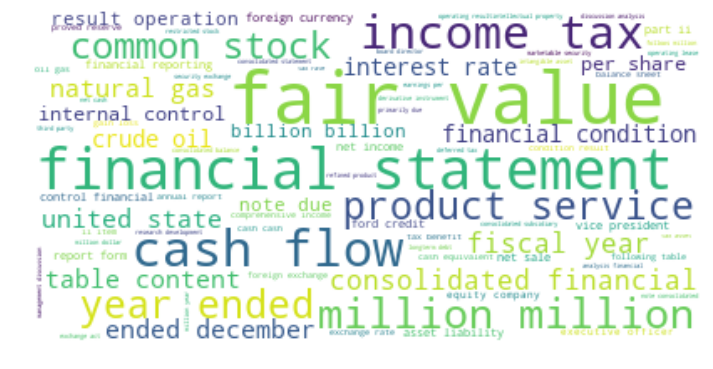

In [105]:
allwords = " ".join(df['Content'])
wordcloud = WordCloud(stopwords=stop, background_color="white").generate(allwords)
plt.figure(figsize=(12, 12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Next, let's visualize the most frequent words, breaking the variable 'allwords' down into individual words using split().  

In [106]:
wordlist = allwords.split()
wordlist[:10] # look at the first ten elements of the list only

['usgaapusgovernmentdebtsecuritiesmember',
 'countryus',
 'usgaapforeignplanmember',
 'usgaapforeignplanmember',
 'usgaapagingofcapitalizedexploratorywellcostsperiodtwomember',
 'srtparentcompanymember',
 'countryus',
 'usgaapforeignplanmember',
 'usgaapnonusmember',
 'xomchemicalmember']

Next, count the individual words using the pandas commands "Series()" and "value_counts()"

In [107]:
wordcounts = pd.Series(wordlist).value_counts()[:20]
wordcounts[:10]

company      35236
million      29748
financial    27212
tax          23999
net          22314
year         22098
product      21980
cost         21721
asset        20824
income       20719
dtype: int64

Now, plot those values as a well-labeled barchart.  Notice that the axes are well-labeled and that the chart has a title that describes the data.

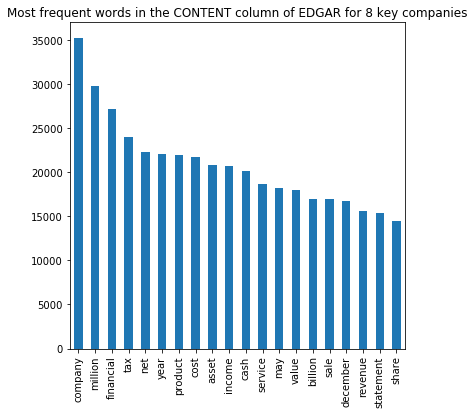

In [108]:
wordcounts.plot(kind='bar', 
                title='Most frequent words in the CONTENT column of EDGAR for 8 key companies',
                 figsize=(6, 6)
               )

The data looks clean and accurate.  However, the most frequent words are "financial", "million", "net", "income", etc. It is likely that most of these files are financial reports or related to financial situation of the companies.

Overall, this isn't a very interesting finding.  It's not surprising at all that high-profile companies have a lot to talk about in terms of the size and scale of their earnings, or that operations, products, and services are major headings of inquiry.  

Herein lies the need for inspecting words more carefully.  In this notebook, we'll do so by examining what is *distinctive* about each company -- what words does Exxon use that Amazon doesn't?  The mathematical tool we'll use to generate a measurement of distinctiveness is "log likelihood."

# Organizing the Data

In the exercise that follows, we'll be measuring what is 'distinctive' about each company.  We could configure the experiment in a variety of ways -- comparing companies; comparing years; comparing all companies and all years.  What we decide to compare governs how we will arrange the database and measure difference.  But in this experiment, we're just comparing companies.  

First, we want to create a dataframe where every company is listed only once, and the 'Content' column holds all the text related to that company.  In df, every company has several rows, each one with the content from a different year.  

In [301]:
log_df = df.copy() # copy df into a new document

In [302]:
# Combine all documents of every company
log_df = log_df.groupby('Company').sum()

In [303]:
log_df[:10]

,Content,Period of Report
Company,,
AMAZON COM INC,document usgaapproductmember usgaapservicememb...,2019-12-312018-12-312017-12-312016-12-312015-1...
APPLE INC,statessecurities exchange commissionwashington...,2020-09-262019-09-282018-09-292017-09-302016-0...
Alphabet Inc.,document usgaapcommonclassbmember googcapitalc...,2019-12-312018-12-312018-12-312017-12-312016-1...
EXXON MOBIL CORP,usgaapusgovernmentdebtsecuritiesmember country...,2019-12-312018-12-312017-12-312016-12-312015-1...
FORD MOTOR CO,statessecurities exchange commissionwashington...,2020-12-312019-12-312018-12-312017-12-312017-1...
MARATHON PETROLEUM CORP,content united state security exchange commiss...,2020-12-312019-12-312018-12-312017-12-312016-1...
MICROSOFT CORP,false fy usgaapcommonstockmember xbrlishares x...,2020-06-302019-06-302018-06-302017-06-302016-0...
RAYTHEON CO,page security exchange commission washington f...,1994-12-31


Notice that the entire dataset is only eight rows long.  All the 'Content' columns for multiple entries for Exxon have been pasted into one column.

### You can "group by" different fields 

Notice, also, that we could use .groupby() here to create a dataset organized around ANY field in the data.  We could organize the data around time:
        
        log_df = df.copy() 
        log_df = log_df.groupby('Period of Report').sum() 

Alternatively, if we had data about Republicans and Democrats or men and women speakers, or around speeches where "climate change" occurred and speeches that reference "the environment," we could organize the data around those fields.

Look at how this version of the data looks different:

In [314]:
log_df_period = df.copy() 
log_df_period = log_df_period.groupby('Period of Report').sum() 
log_df_period[:10]

,Company,Content
Period of Report,,
1994-12-31,RAYTHEON CO,page security exchange commission washington f...
2001-06-30,MICROSOFT CORPMICROSOFT CORP,united state security exchange commission wash...
2009-12-31,EXXON MOBIL CORPEXXON MOBIL CORP,form table content index financial statement u...
2010-12-31,EXXON MOBIL CORPEXXON MOBIL CORPEXXON MOBIL CO...,table content index financial statement united...
2011-06-30,MICROSOFT CORPMICROSOFT CORP,form table content united state security excha...
2011-09-24,APPLE INCAPPLE INC,form united state security exchange commission...
2011-12-31,EXXON MOBIL CORPAMAZON COM INCEXXON MOBIL CORP...,form table content index financial statement u...
2012-06-30,MICROSOFT CORPMICROSOFT CORP,form table content united state security excha...
2012-09-29,APPLE INCAPPLE INC,form table content united state security excha...


Let's try annotating each report by whether the report writers use the word 'disaster'.

We can use str.contains() to detect whether the text in each report's text column (log_df_disaster['Content']) contains the string 'disaster':

        log_df_disaster['Content'].str.contains('disaster')


This line makes a new column called 'disaster' with the value 'TRUE' for documents that use the word 'disaster' and 'FALSE' if they don't:

        log_df_disaster['disaster'] = log_df_disaster['Content'].str.contains('disaster').copy()


We can group all the reports together for future analysis by using groupby().sum() with the name of the column we're grouping by in parentheses:

        log_df_disaster.groupby('disaster').sum() 



In [330]:
log_df_by_word = df.copy()
log_df_by_word['is_word_there'] = log_df_by_word['Content'].str.contains('diversity').copy() # search for string
log_df_by_word = log_df_by_word.groupby('is_word_there').sum()  # group_by 'is_word_there' T/F
log_df_by_word['total words'] = log_df_by_word['Content'].str.split().str.len() # count the words in each category


In [328]:
log_df_by_word[:10]

,Company,Content,Period of Report,total words
is_word_there,,,,
False,Alphabet Inc.Alphabet Inc.Alphabet Inc.Alphabe...,document usgaapcommonclassbmember googcapitalc...,2019-12-312018-12-312018-12-312017-12-312016-1...,1659887
True,EXXON MOBIL CORPEXXON MOBIL CORPEXXON MOBIL CO...,usgaapusgovernmentdebtsecuritiesmember country...,2019-12-312018-12-312017-12-312016-12-312015-1...,1751715


Please note that we could use this method to try to understand the context of a particular word -- for instance, what is characteristic of speeches that refer to 'climate change' versus 'the environment.'

In [345]:
log_df_by_word2 = df.copy()
log_df_by_word2['is_word_there'] = log_df_by_word2['Content'].str.contains('environmental').copy() # search for string
log_df_by_word2 = log_df_by_word2.groupby('is_word_there').sum()  # group_by 'is_word_there' T/F
log_df_by_word2['total words'] = log_df_by_word2['Content'].str.split().str.len() # count the words in each category
log_df_by_word2 = log_df_by_word2.append(log_df_by_word)
log_df_by_word2

,Company,Content,Period of Report,total words
is_word_there,,,,
False,Alphabet Inc.Alphabet Inc.MICROSOFT CORPAlphab...,amendment form united state security exchange ...,2018-12-312015-12-312001-06-302018-12-312015-1...,62176
True,EXXON MOBIL CORPEXXON MOBIL CORPEXXON MOBIL CO...,usgaapusgovernmentdebtsecuritiesmember country...,2019-12-312018-12-312017-12-312016-12-312015-1...,3349426
False,Alphabet Inc.Alphabet Inc.Alphabet Inc.Alphabe...,document usgaapcommonclassbmember googcapitalc...,2019-12-312018-12-312018-12-312017-12-312016-1...,1659887
True,EXXON MOBIL CORPEXXON MOBIL CORPEXXON MOBIL CO...,usgaapusgovernmentdebtsecuritiesmember country...,2019-12-312018-12-312017-12-312016-12-312015-1...,1751715


Now, however, we'll go back to a version of the data organized by 'company' so that we can compare the words most distinctive of every corporation's style of reporting.

In [355]:
log_df[:10]

,Content,Period of Report
Company,,
AMAZON COM INC,document usgaapproductmember usgaapservicememb...,2019-12-312018-12-312017-12-312016-12-312015-1...
APPLE INC,statessecurities exchange commissionwashington...,2020-09-262019-09-282018-09-292017-09-302016-0...
Alphabet Inc.,document usgaapcommonclassbmember googcapitalc...,2019-12-312018-12-312018-12-312017-12-312016-1...
EXXON MOBIL CORP,usgaapusgovernmentdebtsecuritiesmember country...,2019-12-312018-12-312017-12-312016-12-312015-1...
FORD MOTOR CO,statessecurities exchange commissionwashington...,2020-12-312019-12-312018-12-312017-12-312017-1...
MARATHON PETROLEUM CORP,content united state security exchange commiss...,2020-12-312019-12-312018-12-312017-12-312016-1...
MICROSOFT CORP,false fy usgaapcommonstockmember xbrlishares x...,2020-06-302019-06-302018-06-302017-06-302016-0...
RAYTHEON CO,page security exchange commission washington f...,1994-12-31


# Working With Wordcount Vectors

Next, we're going to import some statistics tools from the SKLEARN package (pronounced 'sci kit learn.').  The first tool is CountVectorizer(). 


In [ ]:
# use as necessary
#!pip install sklearn --user
#!pip install numpy --user

In [116]:
from sklearn.feature_extraction.text import CountVectorizer


Countvectorizer() will begin thinking about making a dataframe for counting every word of the corpus.  for it to work, we have to set some presets: how many features a giant column of entries of counts for every word in the entire corpus (a 'wordcount vector', which we're calling 'allwordcountsvector').  The word 'finance' will have a row; 'security; will have a row, etc.  

In [205]:
vectorizer = CountVectorizer(max_features=10000, lowercase=True, ngram_range=(1, 2), analyzer = "word")

Note that there isn't anything IN vectorizer yet; we can't look at it.  It's just a collection of commands:
- max_features -- tells the vectorizer to look for only the most frequent 10000 terms in the corpus; this means it will throw out many one-time or two-time features.
- lowercase=True tells the vectorizer to lowercase everything -- strictly speaking it's redundant since we already did that above.
- ngram_range=(min, max) means that we're asking it to find all one-word ngrams, but nothing over two n-grams in a row. we could play with this.  
-analyzer -- can be "word" or "char".  

SKLEARN has a lot of built-in features for using these tools to make word vectors very smart -- for example, creating custom stop-word lists.  To read up on countvectorizer(), see  https://kavita-ganesan.com/how-to-use-countvectorizer/

Next, we'll use the fit_transform() command from SKLEARN to create a giant column of entries of counts for every word in the entire corpus (a 'wordcount vector', which we're calling 'vectorizer').  The word 'finance' will have a row; 'security; will have a row, etc.  

In [206]:
vectorized = vectorizer.fit_transform(log_df['Content'])

Great! You made a word vector. Now what's inside?

### Navigating a Word Vector

A Word Vector stores the counted up word tallies in the specified column, in this case, ['Content']. They are grouped by the rows in the dataframe, in this case, ['Company']. So we should be able to extract lots of information: a list of words, a list of counts, and how many different matrices (one per company) there are.

To extract the word names, we use 

        vectorizer.get_feature_names() 
        
        
To extract the word counts, we use

        vectorizer.todense()
        

To extract general information about how many words and counts there are, we use

        vectorized.shape


We can also look at any individual item in the word vector by calling its coordinates:

        vectorized[company_id, word_id]


Here's what it actually looks like.  To make wordcount vectors swift, the computer stores the wordcounts as numbers; the labels 'word' and 'company' are stored elsewhere.

In [207]:
print(vectorizer.get_feature_names()[:100])

['aaarated', 'aaarated money', 'ab', 'ability', 'ability attract', 'ability compete', 'ability maintain', 'ability make', 'ability manage', 'ability obtain', 'ability sell', 'able', 'absence', 'absolute', 'absolute assurance', 'absolute dollar', 'abu', 'abu dhabi', 'ac', 'academic', 'accelerate', 'accelerated', 'accelerated depreciation', 'accelerated filer', 'accept', 'acceptable', 'acceptable term', 'acceptance', 'accepted', 'accepted accounting', 'accepted united', 'access', 'accessory', 'accessory service', 'accident', 'accommodate', 'accompanying', 'accompanying consolidated', 'accompanying management', 'accompanying note', 'accord', 'accordance', 'accordance accounting', 'accordance authorization', 'accordance gaap', 'accordance generally', 'accordance security', 'accordance standard', 'according', 'accordingly', 'account', 'account payable', 'account receivable', 'accountant', 'accountant accounting', 'accountant fee', 'accounted', 'accounted equity', 'accounted subscription', '

In [359]:
vectorized.todense()

matrix([[ 76,  76,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   8,   0,   0],
        [  0,   0,   0, ..., 266,   0,   0],
        ...,
        [  0,   0,  18, ...,   0,   0,   0],
        [  0,   0,  44, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]], dtype=int64)

The 'vectorized' variable also has information about the wordcounts per company.  It is a matrix with eight columns and 10,000 words each (remember how we set the word vectors to count the most common 10,000 words?) 

In [209]:
vectorized.shape

(8, 10000)

We can call the wordcount vector matrix by giving it the coordinate of every company (0 is Amazon, 7 is Raytheon) and the id number of every word (0 to 10000).

Here's what it actually looks like.  To make wordcount vectors swift, the computer stores the wordcounts as numbers; the labels 'word' and 'company' are stored elsewhere.

So let's try it out.  How many times does the Exxon documentation (#3 when you start counting from zero, as Python does) mention the word "ability" (#2 in the wordlist when you start counting from zero)?

In [210]:
vectorized[3, 2]

0

### Getting information out of a Word Vector

That's great.  But it's also a little hard to use, frankly; matrices are notoriously hard to get labels out of.  Ideally we'd like a dataframe with a column called "word" and another column called "company," and the wordcount for each.  


The NUMPTY and PANDAS packages excel at normalizing difficult-to-read data formats.

In [211]:
# !pip install numpy --user 

In [212]:
import numpy as np

Let's make a list of words.  We can use

        vectorizer.get_feature_names()
       

In [213]:
all_words = np.array(vectorizer.get_feature_names())

In [214]:
all_words[:10]

array(['aaarated', 'aaarated money', 'ab', 'ability', 'ability attract',
       'ability compete', 'ability maintain', 'ability make',
       'ability manage', 'ability obtain'], dtype='<U64')

Let's make a list of companies. We have this information in the 'row' names of log_df.  

Specifying 
        
        .axes[0] 


lets us call the vertical axis names (that is, the row names of the dataframe).  Two other commands:

        to_numpy()  
        list()


helps with formatting.  Put together:

        list(df.axes[0].to_numpy())
        

In [215]:
company_names = list(log_df.axes[0].to_numpy())

In [216]:
company_names

['AMAZON COM INC',
 'APPLE INC',
 'Alphabet Inc.',
 'EXXON MOBIL CORP',
 'FORD MOTOR CO',
 'MARATHON PETROLEUM CORP',
 'MICROSOFT CORP',
 'RAYTHEON CO']

We can glue together all_words and company_names into an easy-to-read DataFrame using pandas' pd.DataFrame():

In [217]:
vectors_dataframe = pd.DataFrame(vectorized.todense(), # the matrix we saw above is turned into a dataframe
                                 columns=all_words,
                                 index = company_names
                                 )

In [218]:
vectors_dataframe

,aaarated,aaarated money,ab,ability,ability attract,ability compete,ability maintain,ability make,ability manage,ability obtain,...,yield,yield curve,york,york mellon,york stock,young,young llp,youtube,zakum,zev
AMAZON COM INC,76,76,0,235,0,0,0,0,0,0,...,0,0,21,0,0,122,73,0,0,0
APPLE INC,0,0,0,438,24,42,20,0,48,56,...,88,28,84,20,56,130,110,8,0,0
Alphabet Inc.,0,0,0,463,45,27,0,0,10,0,...,10,0,34,28,0,116,112,266,0,0
EXXON MOBIL CORP,0,0,0,407,0,0,26,0,50,0,...,104,38,163,0,87,0,0,0,77,0
FORD MOTOR CO,0,0,26,349,4,0,27,10,0,69,...,173,44,72,0,67,3,0,0,0,94
MARATHON PETROLEUM CORP,0,0,18,430,0,13,0,19,11,15,...,144,37,177,96,35,0,0,0,0,0
MICROSOFT CORP,0,0,44,672,84,0,4,56,0,0,...,38,0,366,358,6,0,0,0,0,0
RAYTHEON CO,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0


We're going to use this dataframe -- vectors_dataframe -- as the basis for our log likelihood calculations.  It's just a table of word counts that has been standardized across all companies, so that we can easily count the number of words in the total corpus (= the number of columns), the number of words in any company's corpus (= the number of non-zero columns per row), and the count of any word. 

 To use that information, we're going to have to be able to look up the entry for a word per company. If we want to call a particular company-word count up, like we did above, we use the pandas iat[] command for looking up a value.  The rule is iat[column, row], or for our purposes, [company, word].  Remember that numbering in Python always starts with 0, so [0, 1] is the entry for the first company (Amazon) and the second word over (aaarated money):

In [ ]:
vectors_dataframe.iat[0,1]

In [ ]:
vectors_dataframe.iat[7,3]

### Play Around With Count_Vectorizer 

You may be thinking that this was a lot of work for a wordcount dataframe that you could have made in simpler ways.  But you've just learned an incredibly powerful tool.  

Remember, above, how we learned that CountVectorizer took many arguments, including ngrams?  We asked our Count_Vectorizer instance to count one-grams and bigrams, but we could ask it to count three-word-phrases and four-word phrases as well. 

Let's play with a vector that only counts 3 and 4 word ngrams. 

In [169]:
vectorizer2 = CountVectorizer(max_features=100000, 
                              lowercase=True, 
                              ngram_range=(3, 4),  # <-- note that we changed the arguments here from (1, 2) to (3, 4). That's a lower and an upper bound.
                              analyzer = "word")

In [170]:
vectorized2 = vectorizer2.fit_transform(log_df['Content'])

In [171]:
all_words = np.array(vectorizer2.get_feature_names())

vectors_dataframe2 = pd.DataFrame(vectorized2.todense(), # the matrix we saw above is turned into a dataframe
                                 columns=all_words,
                                 index = company_names
                                 )

In [172]:
vectorized2.shape

(8, 100000)

In [173]:
vectors_dataframe2

,aaa cash investment,aaa cash investment excess,aaarated money market,aaarated money market fund,aardolie maatschappij bv,aardolie maatschappij bv qatar,ab diluted ac,abandonment date total,abandonment date total consolidated,abandonment rehabilitation obligation,...,youtube engagement ad,youtube google play,zakum field major,zakum field major offshore,zakum oil concession,zakum oil concession thousand,zapolsky mr zapolsky,zapolsky mr zapolsky served,zip code registrant,zip code registrant telephone
AMAZON COM INC,0,0,76,76,0,0,0,0,0,0,...,0,0,0,0,0,0,17,17,0,0
APPLE INC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,10,10
Alphabet Inc.,0,0,0,0,0,0,0,0,0,0,...,59,24,0,0,0,0,0,0,2,2
EXXON MOBIL CORP,0,0,0,0,22,20,0,25,25,25,...,0,0,22,22,23,23,0,0,24,24
FORD MOTOR CO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MARATHON PETROLEUM CORP,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
MICROSOFT CORP,20,20,0,0,0,0,20,0,0,0,...,0,0,0,0,0,0,0,0,0,0
RAYTHEON CO,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Pretty cool, eh? We're not going to do anything with this -- although you certainly could use it for the exercise that follows.  

You can actually use the features of CountVectorizers to do all sorts of things -- to clean your data, stopword it, lowercase it, and even implement a controlled vocabulary.

For instance, if I had a controlled vocabulary called my_dict and a stopwords list called stop_words_list, I could do this:

    CountVectorizer(lowercase=True, 
                stop_words = stop_words_list,
                vocabularyMapping = my_dict,
                ngram_range=(3, 4),
                analyzer = "word")


Read up more here: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html

### Use Word Vectors to Count Totals

Did you know that you can use Word Vectors as another method to count the number of words in a corpus?  You can!  Just like Counter, most_common(), and .value_counts() -- the tools for counting words we've used so far -- Word Vectors can be used to total the number of words.

Here are the per-company total words.

In [219]:
company_words_total = vectors_dataframe.sum(axis=1)
company_words_total

AMAZON COM INC              543497
APPLE INC                   651037
Alphabet Inc.               408992
EXXON MOBIL CORP           1080451
FORD MOTOR CO               536860
MARATHON PETROLEUM CORP     545557
MICROSOFT CORP              801616
RAYTHEON CO                   4115
dtype: int64

Poor Raytheon!  Apparently they don't employ many writers!

Here are the per-word totals across all companies.

In [220]:
word_totals = vectors_dataframe.sum(axis=0) 
word_totals

aaarated             76
aaarated money       76
ab                   88
ability            2995
ability attract     157
                   ... 
young               371
young llp           295
youtube             274
zakum                77
zev                  94
Length: 10000, dtype: int64

How many words are there overall?

In [221]:
total_corpus_words = sum(word_totals)
total_corpus_words

4572125

Now that we have statistics on how many words or phrases were detected around each company, and how many appearances there are per word, as well as word per company, we're in a position to do statistics.

# Measuring Distinction with Log Likelihood

Now that we can count the frequency of each word per company, we can use that information to calculate the log likelihood of each word per company.  As we saw in this week's reading, LL is an excellent proxy for "distinctiveness;" high LL scores correspond fairly well to what is unique about each document.  Thus we'll use LL scores to find out which words appear in Amazon's filing but not Raytheon's, etc.

### Python as a calculator

Remember, Python can act just like a calendar.

In [222]:
5 + 5

10

In [223]:
a = 5
b = 5
a + b

10

### Logarithm refresher

Remember from high school math that a logarithm is a function that "normalizes" big and small numbers from 0 up, so that you can plot enormous differences along a much smaller axis:

In [224]:
np.log(1)

0.0

In [225]:
np.log(100)

4.605170185988092

In [226]:
np.log(100000000000)

25.328436022934504

Also, remember that Log doesn't like zeros:

In [227]:
np.log(0)

/hpc/applications/anaconda/3/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


-inf

### A Very Basic Intro to the Log Likelihood Equation

The LL calculation -- which we'll perform for each word-company pair -- depends on variables a, b, c, and d: 
- a: how many times the word being measured appears in ONE company whose distinction we're measuring.                                     
- b: how many times the word being measured appears in all OTHER companies               
- c: how many OTHER words appear in the company whose distinction we're measuring
- d: how many times OTHER words appears in all OTHER companies


We've actually already generated all the information we need for a, b, c, d.  Really! We're nearly there.

- a: how many times each word occurs per company lives in the vectors_dataframe.  We can call it for each company and word: 
                
                    vectors_dataframe.iat[company number, word id]
                    
                 
- b: How many times each word appears in all other companies -- is equal to the the total number of occurrences of tha Word, minus a. Recall that we have a dataframe called word_totals, where words are arranged in the same order as they are in vectors_dataframe.  So we can call this number withL 
            
                    word_totals[word_id] - a                 
                    
                    
- c: the company's total words lives in a dataframe called company_words_total.  We can get the total of OTHER words by calling that total and subtracting a. We can reference the proper row this way:

                company_words_total[company_id] - a
                
                
- d: the sum of other companies' use of other words is equal to the total number of words in the corpus, minus a, b, and c.  Fortunately, we already calculated the total number of words and saved it as a variable:
                
                total_corpus_words - a - b - c 

Here's the log likelihood equation that we showed you above, in code. 

Notice that we make sure that we don't have any zeros in if(b > 0):

In [228]:
# create an empty dataframe
companies_loglikelihood = []

#loop through every company in company_names
for company_id, company in enumerate(company_names):
    loglikely = []
    # loop through every word in the wordcount vector:
    for word_id in vectorized[company_id].indices:
        
        a = vectors_dataframe.iat[company_id, word_id] #  word in company
        b = word_totals[word_id] - a  # # word in remaining companies
        c = company_words_total[company_id] - a #  not word in company
        d = total_corpus_words - a - b - c # not word in remaining
       
        E1 = (a + c) * (a + b) / total_corpus_words  
        E2 = (b + d) * (a + b) / total_corpus_words 
        
        LL = 2 * (a * np.log(a / E1)) # the log likelihood equation
        if (b > 0):
            LL += 2 * b * np.log(b / E2)
        
        loglikely.append((LL, all_words[word_id])) # add the log likelihood score to the end of a new dataframe

    loglikely = sorted(loglikely, reverse=True) # the loop hits this every time it cycles through all the words in one company. 
    companies_loglikelihood.append(loglikely) # add on another company


Now we have a log-likelihood score for each company-word combination.  It's organized as a list of lists.  

Each company list of words is organized in by descending log-likelihood score. Here's APPLE INC: 

In [229]:
companies_loglikelihood[1][:5]

[(36321.92153315482, 'company'),
 (8512.452151547704, 'september'),
 (6037.753911575501, 'net sale'),
 (5799.592246841475, 'apple'),
 (4604.234081253629, 'mac')]

Here's the most distinctive words per company:

In [230]:
print("The 20 most distinctive words in each company. The words are listed from high to low ranking")
print("-------------------------------------------\n")
for i, company in enumerate(company_names):
    print(company + ": ", end='')
    distinct_words = [word[1] for word in companies_loglikelihood[i][:20]]
    print(distinct_words)
    print("\n-----------------------------\n")

The 20 most distinctive words in each company. The words are listed from high to low ranking
-------------------------------------------

AMAZON COM INC: ['fulfillment', 'seller', 'amazoncom', 'complaint', 'amazon', 'amazoncom inc', 'corporation', 'aws', 'company', 'item part', 'shipping', 'district', 'production', 'website', 'tax', 'state district', 'stockbased compensation', 'provided used', 'electronic', 'wrongdoing']

-----------------------------

APPLE INC: ['company', 'september', 'net sale', 'apple', 'mac', 'iphone', 'december', 'september september', 'inc form', 'company product', 'store', 'ipad', 'corporation', 'apple inc', 'io', 'component', 'september company', 'itunes', 'product', 'thirdparty']

-----------------------------

Alphabet Inc.: ['google', 'class', 'contentsalphabet', 'alphabet', 'class common', 'class capital', 'capital stock', 'network member', 'ad', 'google network', 'form file', 'advertiser', 'share class', 'revenue', 'user', 'advertising', 'member', 'class

We can see most of the distinctive words are companies' own names or own products. For example, we can see "Microsoft" and "Window" appear the most in Microsoft Corp, or "Gas", "Oil" appear as high rankings in EXXON. 

## Visualizing the distinctiveness of the language of each company

Can visualizing the data help us to better understand these words and how they relate to the companies?

In [231]:
!pip install adjustText --user
import adjustText
import matplotlib

Note that we're going to make a big plot, and this might take a minute or two to run.

In [ ]:
%matplotlib inline
from adjustText import adjust_text

#plt.show()
# change the figure's size here
fig = plt.figure(figsize=(10,10), dpi = 500)

# style
plt.style.use('seaborn-darkgrid') # this gives us a grid with a dark background.  you can play with this to change the style.
  
# create a color palette
palette = plt.get_cmap('hsv') # this tells matplotlib what colors to use.  you can play with this to change the colors.

num = 0

# change the figure's size here
plt.figure(figsize=(15,15), dpi = 300)

texts = []

# this is the for loop that creates multiple plots.  
for i, company in enumerate(company_names):
        num += 14 # num tells the plot to choose a different color for each company
        distinct_words = companies_loglikelihood[i][:20] # plot the top twenty words by LL-score
        for word in distinct_words: # for each word-per-company instance, plot the ll_score on the y axis
            ll_score = word[0] # find just the ll-score from companies_loglikelihood
            word_label = word[1] # find just the keyword name from companies_loglikelihood
            plt.scatter( # draw a dot for each word
                    company, # with company on the x axis
                    ll_score, # and ll_score on the y axis
                    color=palette(num), # using a different color for each company
                    linewidth=1, 
                    edgecolors = 'b',
                    s = 55, # size
                    alpha=0.3, # make the dots slightly transparent
                    label=company) # label each dot with the name of the word
            texts.append(plt.text(company, ll_score, word_label)) # save these coordinates to be used in labeling

# Add legend
#plt.legend(loc=2, ncol=2)
plt.xticks(rotation=90)
 
# Add titles
plt.title("Figure 1: Highest Log-Likelihood Scored Words per Company", fontsize=30, fontweight=0, color='Red')
plt.xlabel("Company")
plt.ylabel("Distinctiveness of Words, Measured by LL Score")

# Code to help with overlapping labels -- may take a minute to run
adjust_text(texts, force_points=0.2, force_text=0.2,
            expand_points=(1, 1), expand_text=(1, 1),
            arrowprops=dict(arrowstyle="-", color='black', lw=0.5))



In [233]:
# let's save it!
plt.savefig('LL-fig1.jpg', dpi=fig.dpi)

<Figure size 432x288 with 0 Axes>

In [234]:
plt.show()

Please notice in the left-hand sidebar that we've saved a .jpg of this visualization.  

We can use visualization to really drill down into the comparisons. We learn that overall, Amazon and Raytheon have the least unique language.  Apple and Exxon are more unique.  We could tweak the graph to show more words in a small space, and it gives us a way of inspecing the relative uniqueness of the different word-company pairs.

But the above visualization is also deeply unsatisfying in some respects.  The graph above doesn't add much new information beyond what we had in the list we printed out.

What if we wanted to take things further and compare two companies?

### A 2-D comparison of two companies

The visualization below shows the same data we just looked at, only zooming it to compare two companies.  

Note that we could also do this -- with more accuracy about how two companies compare -- by filtering for only two companies BEFORE we ran the log likelihood equation.  We're not actually creating a measure, here, of the distinctivenss of Amazon and Apple; we're just extracting the information about two companies from the information about how seven companies are different from each other. That's a subtle but important mathematical difference.

What zooming in on two companies can do is to remind us that we've got a great deal of information about a great many words -- many more words than showed up in the visualization above, and much more detail than we get from a bar chart of word frequency.

To begin, let's create a dataframe that has the ll_scores from just two companies. The x coordinate will be how distinctive each word is for AMAZON; the y coordinate will be how distinctive each word is for APPLE.

In [235]:
# create a new dataframe of the scores and words from both apple and amazon
xcoords =  pd.DataFrame(columns=list(['word_label', 'x_llscore']))
ycoords = pd.DataFrame(columns=list(['word_label', 'y_llscore']))

# get all the words from AMAZON
distinctwords = companies_loglikelihood[0]
for word in distinctwords: # for each word-per-company instance, plot the ll_score on the y axis
    x_llscore = word[0] # find just the ll-score from companies_loglikelihood
    word_label = word[1] # find just the keyword name from companies_loglikelihood
    company = 'AMAZON'
    xcoords.loc[-1] = [word_label, x_llscore]
    xcoords.index = xcoords.index + 1  # shifting index
    xcoords = xcoords.sort_index()  # sorting by index

# get all the words from APPLE
distinctwords2 = companies_loglikelihood[1] 
for word in distinctwords2: # for each word-per-company instance, plot the ll_score on the y axis
    y_llscore = word[0] # find just the ll-score from companies_loglikelihood
    word_label = word[1] # find just the keyword name from companies_loglikelihood
    company = 'Microsoft'
    ycoords.loc[-1] = [word_label, y_llscore]
    ycoords.index = ycoords.index + 1  # shifting index
    ycoords = ycoords.sort_index()  # sorting by index

coords = pd.merge(xcoords, ycoords, on='word_label')
coords = coords.dropna(axis = 0, how ='any') # drop rows with any NA's

In [236]:
print(coords)

         word_label    x_llscore     y_llscore
0     proceeds sale     0.000003      0.206065
1              term     0.000017      8.784918
2       free charge     0.000023     34.106954
3      fixed charge     0.000058      3.673340
4           advisor     0.000160     23.813382
...             ...          ...           ...
4255       district  1910.975726      9.254161
4256       shipping  1960.283733     26.432356
4257        company  2060.894584  36321.921533
4258    corporation  2411.149049   2903.400017
4259      complaint  3152.857051    273.531059

[4260 rows x 3 columns]


If you wanted to only look at the top words by the log-likelihood score of Amazon, what would you do?

In [237]:
top_amazon_coords = coords.nlargest(20,['x_llscore','y_llscore']) #notice that nlargest can take multiple arguments, in order of priority
top_amazon_coords

,word_label,x_llscore,y_llscore
4259,complaint,3152.857051,273.531059
4258,corporation,2411.149049,2903.400017
4257,company,2060.894584,36321.921533
4256,shipping,1960.283733,26.432356
4255,district,1910.975726,9.254161
4254,production,1694.217782,1504.593388
4253,website,1606.860256,110.711700
4252,tax,1580.384017,1.696762
4251,state district,1338.154870,57.645320
4250,electronic,1233.554881,0.002809


Note that the LL scores, in this case, have already been calculated against all other companies; these aren't the top scores of how different amazon is from apple.  To get those scores, we'd have to run LL again on just the two companies.  Instead, we're zooming in on the differences between Apple and Amazon: "corporation" is very important to both of them, while "complaint," "court", and "tax" are only important to Amazon.  I wonder what Amazon has been up to?

When we compare just two companies, we may want a different visualization to dramatize their differences.

In [202]:
#!pip install adjustText --user

In [ ]:
%matplotlib inline

from adjustText import adjust_text

# change the figure's size here
plt.figure(figsize=(20,20), dpi = 500)

# label each dot with the name of the word -- note that we have to use a "for" loop for this to work; plt.annotate only plots
# one label per iteration!
for i, txt in enumerate(coords['word_label']):
    # draw a dot for each word
    plt.scatter( 
        coords['x_llscore'][i], #x axis
        coords['y_llscore'][i], # y axis
        linewidth=1, 
        s = 55, # dot size
        alpha=0.2)  # dot transparency
    # make a label for each word
    plt.annotate(
        txt, 
        (coords['x_llscore'][i], # one x llscore at a time
         coords['y_llscore'][i]), # one y llscore at a time
        alpha=0.3 # i've made the fonts transparent as well.  you could play with color and size if you wanted to. 
    )

plt.xticks(rotation=90)

# logarithmic axes make big things big and small things small
plt.xscale('log')
plt.yscale('log')  

# Add titles
plt.title("Figure 2: Highest Log-Likelihood Scored Words per Company", fontsize=30, fontweight=0, color='Red')
plt.xlabel("How Distinctive Each Word is of AMAZON")
plt.ylabel("How Distinctive Each Word is of APPLE")

In [204]:
plt.show()

Interpreting the figure above isn't completely intuitive, but it has a lot of information for us.  Words that are equidistant from the x axis and the y axis -- which run on a diagonal from the lower-left-hand corner to the upper-right-hand-corner -- are equally distinctive of both Amazon and Apple.  Words that are closer to the y axis are more distinctive of Apple, while words that are closer to the x axis are more distinctive of Amazon.  There are a number of words that are highly distinctive of both (in comparison with Raytheon, etc.), as we would expect from two tech companies. 

Notice how you could use both of the last two visualizations to complicate your discussion of what is most distinctive about any two companies in relation to each other, as well as each company in relationship to the whole subset.

Also, pay attention to whether you need to tweak the visualizations to make them readable.  You can make FIGURE 2 even bigger; you can also restrict FIGURE 2 to showing the 200 highest-scoring words rather than all the words; any of these moves might make it easier to read and interpret the data.

# From Data to Analysis

If we want to really understand the results we've generated, we need to look carefully at the data visualizations we've made and think about all that might be remarkable about them.  Why is Microsoft concerned about "complaint," for example? We're looking for anything that might surprise or support an argument.  And looking for possible surprises is only the first step -- next we have to look into what those words *actually mean*.

Note that, if we want to look back at the original text, we can't just load the dataframe 'df.'  We cleaned it and stopworded it.   We'll have to reload 'df' again from the original text so that you have all the stopwords and punctuation in the original documents.  Fortunately, you made a backup called edgar-data.csv in the first section of this notebook. Let's return to it.

In [239]:
df = pd.read_csv("edgar-data.csv") 

In [240]:
df[:5]

,Company,Content,Period of Report,Accepted,CIK,Documents,Filing Date,SROs
0,EXXON MOBIL CORP,\n\n\n\n\n\n\n\n\n\n 0.086252036-04-012021-08-...,2019-12-31,NaN,NaN,NaN,NaN,NaN
1,EXXON MOBIL CORP,\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n \n\n\n\n...,2018-12-31,NaN,NaN,NaN,NaN,NaN
2,EXXON MOBIL CORP,\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n \n\n\n\n...,2017-12-31,NaN,NaN,NaN,NaN,NaN
3,EXXON MOBIL CORP,\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n \n\n\n\n...,2016-12-31,NaN,NaN,NaN,NaN,NaN
4,EXXON MOBIL CORP,\n\n\n\n\n\n\n\n\n\n\n \n\n\n\n\n\n\n \n\n\n\n...,2015-12-31,NaN,NaN,NaN,NaN,NaN


pull out all the text for the relevant company from the 'Content' columns

In [241]:
n= 20

text = []

for i in range(0,len(df)):
    if df['Company'][i] == "AMAZON COM INC":
        cell_text = df['Content'][i]
        text.append(cell_text)

alltext = ' '.join(text)
len(alltext)

5140518

Add some functions for defining ngrams 

In [242]:
def getNGrams(wordlist, n):
    ngrams = []
    for i in range(len(wordlist)-(n-1)):
        ngrams.append(wordlist[i:i+n])
    return ngrams

def nGramsToKWICDict(ngrams):
    keyindex = len(ngrams[0]) // 2

    kwicdict = {}

    for k in ngrams:
        if k[keyindex] not in kwicdict:
            kwicdict[k[keyindex]] = [k]
        else:
            kwicdict[k[keyindex]].append(k)
    return kwicdict


def prettyPrintKWIC(kwic):
    n = len(kwic)
    keyindex = n // 2
    width = 10

    outstring = ' '.join(kwic[:keyindex]).rjust(width*keyindex)
    outstring += str(kwic[keyindex]).center(len(kwic[keyindex])+6)
    outstring += ' '.join(kwic[(keyindex+1):])

    return outstring



Break up the full record of the EDGAR text into a wordlist and into nGrams and a KWIC dictionary

In [243]:
fullwordlist = alltext.split()
ngrams = getNGrams(fullwordlist, n)
worddict = nGramsToKWICDict(ngrams)
print(worddict["company"][:5])

[['Exchange', 'Act.Large', 'accelerated', 'filer', '☒Accelerated', 'filer', '☐Non-accelerated', 'filer', '☐Smaller', 'reporting', 'company', '☐', 'Emerging', 'growth', 'company', '☐If', 'an', 'emerging', 'growth', 'company,'], ['☒Accelerated', 'filer', '☐Non-accelerated', 'filer', '☐Smaller', 'reporting', 'company', '☐', 'Emerging', 'growth', 'company', '☐If', 'an', 'emerging', 'growth', 'company,', 'indicate', 'by', 'check', 'mark'], ['☐Indicate', 'by', 'check', 'mark', 'whether', 'the', 'registrant', 'is', 'a', 'shell', 'company', '(as', 'defined', 'in', 'Rule', '12b-2', 'of', 'the', 'Exchange', 'Act).'], ['Contents•the', 'potential', 'impairment', 'of', 'customer', 'and', 'other', 'relationships', 'of', 'the', 'company', 'we', 'acquired', 'or', 'in', 'which', 'we', 'invested', 'or', 'our'], ['risks', 'our', 'other', 'businesses', 'face;•potential', 'unknown', 'liabilities', 'associated', 'with', 'a', 'company', 'we', 'acquire', 'or', 'in', 'which', 'we', 'invest;', 'and•for', 'forei

In [244]:
# output KWIC for target word
target = 'wrongdoing'
outstr = '<pre>'
if target in worddict:
    for k in worddict[target]:
        outstr += prettyPrintKWIC(k)
        outstr += '             '
else:
    outstr += 'Keyword not found in source'

outstr += '</pre>'
outstr

'<pre>                               Saldana cases with prejudice. We dispute any remaining allegations of   wrongdoing   and intend to defend ourselves vigorously in these matters.In                                                 resolution of the review petition. We dispute the allegations of   wrongdoing   and intend to defend ourselves vigorously in this matter.In                                               the Northern District of California. We dispute the allegations of   wrongdoing   and intend to defend ourselves vigorously in this matter.In                                                      ‘324, ‘867, and ‘311 patents. We dispute the allegations of   wrongdoing   and intend to defend ourselves vigorously in this matter.In                                              interest, attorneys’ fees, and costs. We dispute the allegations of   wrongdoing   and intend to defend ourselves vigorously in this matter.In                                    9,537,762; 9,813,330; 9,826,0

### Interpreting the analysis

It looks like Apple has a lot of boilerplate prose generated by its lawyers, who are worried about charges of wrongdoing. 

At least in these short snippets above, we don't have the material to understand why, or what it means.  Has Apple been sued more regularly in general than the other companies?  

If I were writing a paragraph about Apple, I could look for other words that invoke antitrust legislation or lawsuits.  I can adjust how much of the surrounding passages I see by changing the variable 'n' above to a larger or smaller number.  If I were writing a paragraph about this data, I'd probably want to read at least 50 word chunks, making a list of all the places where Microsoft was being sued, then generalizing about them.  

I could also go looking for outside context.  

If I were researching Apple's's distinctiveness for a final paper, I could use Lexis-Nexus or a caselaw database from the library to find out more about the history of antitrust legistion, looking at specific names that appear in the KWIC.  What is going on with Audible and Zappos?  What is U.S. Patent No. 7,215,962?  

Even a quick query in Wikipedia or Google around a handful of these names would give us plenty to write about: 
* https://en.wikipedia.org/wiki/In_re_Zappos.com,_Inc.,_Customer_Data_Security_Breach_Litigation
* https://news.bloombergtax.com/daily-tax-report/apple-amazon-beat-more-voip-patent-infringement-claims?context=article-related
* https://www.patentlyapple.com/patently-apple/2016/09/apple-lost-a-patent-case-based-on-a-nokia-patent-will-the-eu-now-open-an-antitrust-case-against-nokia-as-promised.html

As you write your paragraph, consider plotting out some strategies for involving library research in your final project.

Again, being able to use KWIC to get a full view of the issue is important to translating mere data into *analysis* and to effectively *interpret* the data so as to make the analysis sharper.  

# Assignment

Each group should do the following:

#### Coding Exercise
* Choose one company to concentrate on.  On the basis of the data, decide why a comparison between this company and another company would be most instructive, and change the parameters of Figure 2 and the 'coords' dataframe to give you a comparison between these two companies. 
    * Recreate Figure 2 with the new comparison between two companies. 
    * Write an interpretive paragraph explaining what we can learn from this visualization. Interpret Figure 2, explaining why you compared the companies you did, and explaining the meaning of the data.  
* In the code above, we created a dataset grouped by "period" rather than by "company." Use the period-grouped dataset to ascertain which words are most distinctive of every time period in the reporting. 
    * Label this figure, Figure 3.


Find at least three words in your data worth looking up in the actual text.  These should be words that are, prima facie, surprising to you, like 'wrongdoing' or 'deteriorate' in the charts of Amazon.  You can "print" df to the screen and then use the Command+F/CONTRL+F function to keyword search everything on the page -- or you can look around the web for some other efficient ways of "printing" out the text from a dataframe and keyword searching it -- or you could use the KWIC tool above to inspect the data more thoroughly.  Look up some sentences of context, and use the actual discussions to tell us why your company is concerned with those words in particular.  
- Paste the three figures and text into a document of their own.  Do not submit a Python Notebook.  


#### Brainstorming Exercise

* To apply distinctiveness measures to your own work, you will have to first group the data into several categories, using the instructions in the “pandas” notebook and previous notebooks using the “group_by” command.  For instance, if you’re measuring novels, you could inspect the difference between the five most productive novelists as measured by the number of novels each wrote.  Or if you were measuring parliament, you could ask about the difference between Conservative party speakers and Liberal party speakers.  What would you “group_by” to better understand your data? 
    * Propose three existing fields that you could group_by to measure distinctiveness. 
    * Write a sentence for each telling us about why this research would potentially be meaningful. 
    * Note that having too many entities measured against each other will produce nonsense.  Measuring five novelists against each other will produce good results; measuring five hundred novelists against each other will only tell you about really, really idiomatic expressions found in each.  Revisit your answers above to indicate how you will narrow the field so that you’re only measuring 5-10 entities in each case.
* Sometimes you need to create a new field to get the desired results. For instance, we created the “decade” and “year” fields by using the datetime package, having only previously had precise temporal measurements.  You can also create special fields that indicates whether a speech is marked the presence of a particular world, using str_detect.  If you combine that work with POS analysis, you could measure the difference between sentences that reference women as a subject and those that reference women as an object. 
    * Propose five new fields that you could create to understand your data better.
    * Write a sentence for each telling us what insight this would potentially give you about your data.